引用

- https://datumstudio.jp/blog/matplotlib-2%E8%BB%B8%E3%82%B0%E3%83%A9%E3%83%95%E3%81%AE%E6%9B%B8%E3%81%8D%E6%96%B9
- https://www.delftstack.com/ja/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
- https://qiita.com/hirayama_yuuichi/items/86a05f87480e518575c9

To Do
- input ⇒yyyymm, カウントデータ
- pivot でデータ整形、加入率の算出
- 棒グラフ、線グラフで推移の表示
- 棒グラフ、線グラフで実際値と加入率の比較

# 準備

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# sns.set_style('whitegrid')

In [3]:
pd_cal_uu = pd.read_csv("../data/input/cal_uu.csv")
pd_countact_count = pd.read_csv("../data/input/contact_count.csv")
pd_effective_count = pd.read_csv("../data/input/effective_count.csv")
pd_join_count = pd.read_csv("../data/input/join_count.csv")

In [4]:
pd_cal_uu.head(3)

,yyyymm,cal_uu
0,2019-01,32509
1,2019-02,29040
2,2019-03,50264


In [5]:
pd_countact_count.head(3)

,yyyymm,contact
0,2019-01,9975
1,2019-02,3745
2,2019-03,2983


In [6]:
pd_effective_count.head(3)

,yyyymm,effective_count
0,2019-01,590
1,2019-02,348
2,2019-03,745


In [7]:
pd_join_count.head(3)

,yyyymm,join_count
0,2019-01,47
1,2019-02,27
2,2019-03,27


# yyyymm結合

In [8]:
df_tmp_out = pd.merge(pd_cal_uu, 
                    pd_countact_count, 
                    on = 'yyyymm',
                    how='outer')

df_tmp_out = pd.merge(df_tmp_out, 
                      pd_effective_count, 
                      on = 'yyyymm',
                      how='outer')

df_tmp_out = pd.merge(df_tmp_out, 
                      pd_join_count, 
                      on = 'yyyymm',
                      how='outer')

In [9]:
df_tmp_out.head(3)

,yyyymm,cal_uu,contact,effective_count,join_count
0,2019-01,32509,9975,590,47
1,2019-02,29040,3745,348,27
2,2019-03,50264,2983,745,27


# 型変更

In [10]:
df_tmp_out.dtypes

yyyymm             object
cal_uu              int64
contact             int64
effective_count     int64
join_count          int64
dtype: object

# 架電数推移

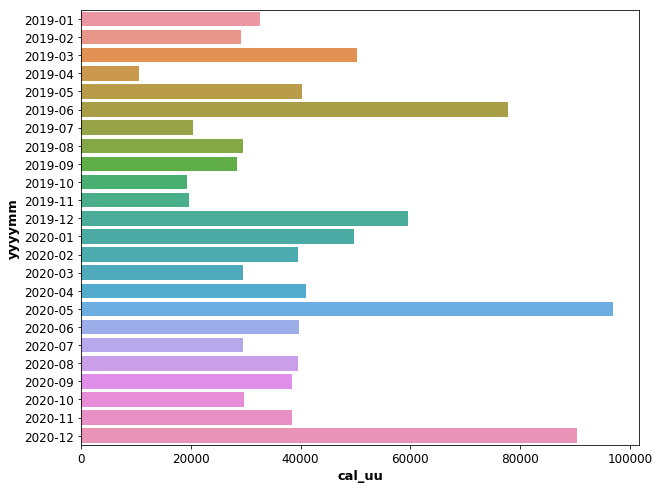

In [11]:
sns.barplot(y="yyyymm", x="cal_uu", data=df_tmp_out)

# 架電数 & コンタクト率

## 上下に配置

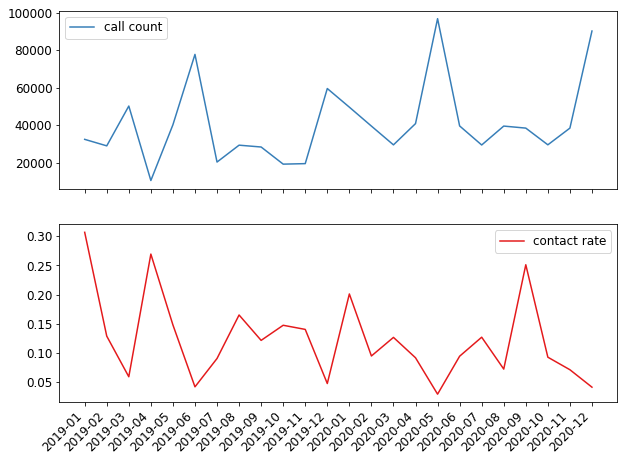

In [12]:
# figureオブジェクトを作成
fig = plt.figure()
# figureオブジェクトに属するaxesオブジェクトを生成
# ex)211 ⇒ 2×1の1へグラフ  212 ⇒ 2×1の2へグラフ
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
 
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.plot(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"],
         color=cm.Set1.colors[1], label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["contact"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="contact rate")

fig.autofmt_xdate(rotation=45)

#凡例をつける
ax1.legend()
ax2.legend()

## 1つのグラフ中に配置

(0, 0.36820572764465226)

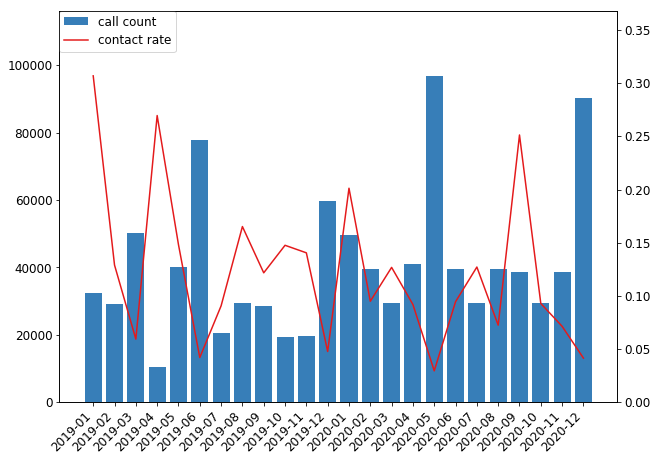

In [14]:
fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["contact"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="contact rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 1.2 * max(df_tmp_out["cal_uu"])
register_max = 1.2 * max(df_tmp_out["contact"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])

# 架電数 & 有効対話率

(0, 0.04005546349217085)

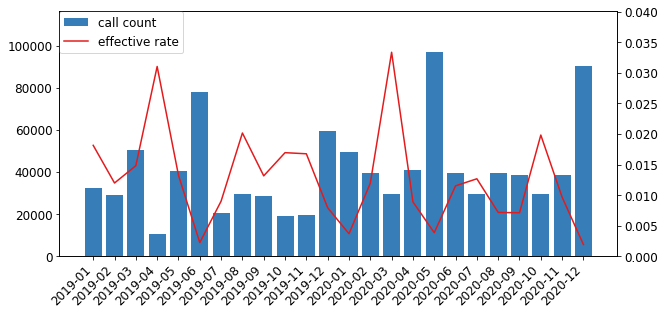

In [16]:
fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["effective_count"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="effective rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 1.2 * max(df_tmp_out["cal_uu"])
register_max = 1.2 * max(df_tmp_out["effective_count"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])

# 架電数 & 有効対話率 &加入率

(0, 0.003067310423175234)

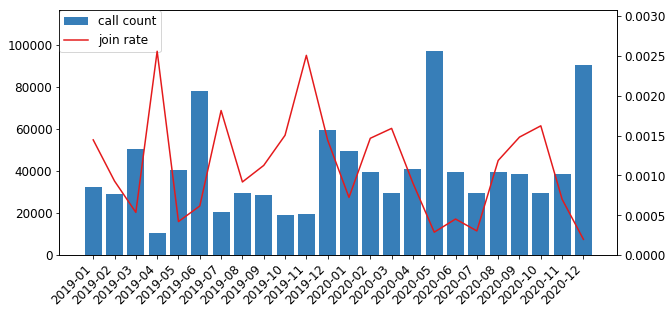

In [17]:
fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["join_count"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="join rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 1.2 * max(df_tmp_out["cal_uu"])
register_max = 1.2 * max(df_tmp_out["join_count"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])

(0, 0.04005546349217085)

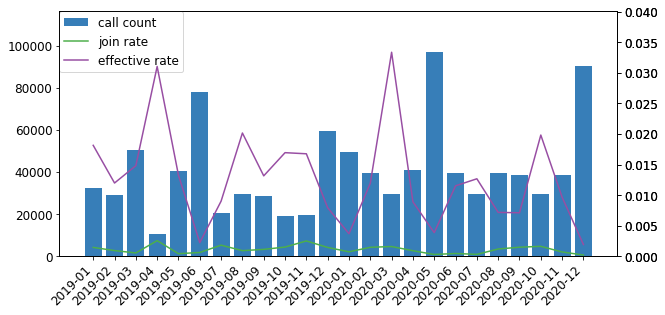

In [18]:
fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
ax3 = ax1.twinx()

  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["join_count"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[2], label="join rate")
ax3.plot(df_tmp_out["yyyymm"], df_tmp_out["effective_count"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[3], label="effective rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
handler3, label3 = ax3.get_legend_handles_labels()

# 凡例をまとめて出力する
ax1.legend(handler1 + handler2 + handler3, label1 + label2 + label3, loc=2, borderaxespad=0.)
    
pageview_max = 1.2 * max(df_tmp_out["cal_uu"])
register_max = 1.2 * max(df_tmp_out["effective_count"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])
ax3.set_ylim([0, register_max])

# 絞る期間でフラグをつけて比較

In [44]:
sel = {'2019-01': "group1", 
       '2019-02': "group1", 
       '2019-03': "group1",
       '2019-04': "group1",
       '2019-05': "group1", 
       '2019-06': "group1",
       '2019-07': "group1",
       '2019-08': "group1", 
       '2019-09': "group1",
       '2019-10': "group1",
       '2019-11': "group1", 
       '2019-12': "group1",
       '2020-01': "group2",
       '2020-02': "group2", 
       '2020-03': "group2",
       '2020-04': "group2",
       '2020-05': "group2", 
       '2020-06': "group2",
       '2020-07': "group2",       
      }

In [45]:
df_tmp_out['time_flag'] = np.nan

df_tmp_out['time_flag'] = df_tmp_out['yyyymm'].map(sel)

new_mart = df_tmp_out.groupby("time_flag").agg({'cal_uu': 'sum', 'contact':'sum', 'effective_count': 'sum', 'join_count':'sum'}).reset_index()

In [46]:
new_mart

,time_flag,cal_uu,contact,effective_count,join_count
0,group1,417149,47395,4998,453
1,group2,325722,31615,3212,233


(0, 0.15374204066566183)

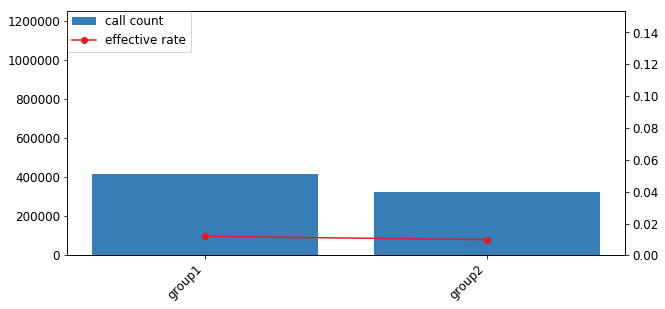

In [49]:
fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(new_mart["time_flag"], new_mart["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(new_mart["time_flag"], new_mart["effective_count"]/new_mart["cal_uu"], marker="o",
         color=cm.Set1.colors[0], label="effective rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 3 * max(new_mart["cal_uu"])
register_max = 1.00 * max(new_mart["effective_count"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])